In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/calendar (1).csv.gz')
df2 = pd.read_csv('/content/listings (1).csv.gz')

In [ ]:
df2.info()

dealing with df2 only

 ### asked chatgpt meaning of column heading(label)

Here’s a breakdown of the main columns (grouped by category for clarity):

🔹 Identifiers & Metadata

id – Unique identifier for the listing.

listing_url – Link to the listing on Airbnb’s website.

scrape_id – Identifier for the dataset scrape (timestamped batch).

last_scraped – Date the data was scraped.

source – Source of the scrape (usually "Airbnb").

name – Title of the listing.

description – Longer description provided by the host.

neighborhood_overview – Description of the neighborhood by the host.

picture_url – Main picture of the listing.

🔹 Host Information

host_id – Unique ID of the host.

host_url – Link to the host’s profile.

host_name – Name of the host.

host_since – Date when the host joined Airbnb.

host_location – Location given by the host.

host_about – Host’s self-description.

host_response_time – Average response time (e.g., “within an hour”).

host_response_rate – Percentage of messages the host responds to.

host_acceptance_rate – Percentage of booking requests accepted.

host_is_superhost – Whether the host is a “Superhost” (yes/no).

host_thumbnail_url / host_picture_url – Profile picture.

host_neighbourhood – Host’s neighborhood.

host_listings_count – Number of listings the host has.

host_total_listings_count – Total count across Airbnb.

host_verifications – Types of verification (e.g., email, ID, phone).

host_has_profile_pic – Yes/No.

host_identity_verified – Whether host’s identity is verified.

🔹 Location Information

neighbourhood – Neighborhood name (raw).

neighbourhood_cleansed – Standardized Airbnb neighborhood.

neighbourhood_group_cleansed – Larger geographic grouping (sometimes empty).

latitude / longitude – Geo-coordinates of the listing.

🔹 Property & Room Information

property_type – Type (Apartment, House, etc.).

room_type – Type of room (Entire home/apt, Private room, Shared room).

accommodates – Maximum number of guests.

bathrooms – Number of bathrooms (numeric, may have missing values).

bathrooms_text – Text version (e.g., “1.5 shared baths”).

bedrooms – Number of bedrooms.

beds – Number of beds.

amenities – List of amenities (Wi-Fi, AC, kitchen, etc.).

🔹 Price & Nights

price – Price per night (string with currency).

minimum_nights / maximum_nights – Booking restrictions.

minimum_minimum_nights / maximum_minimum_nights – Observed limits over time.

minimum_maximum_nights / maximum_maximum_nights – Same idea but for maximum nights.

minimum_nights_avg_ntm / maximum_nights_avg_ntm – Average minimum/maximum nights over the year.

🔹 Availability & Calendar

calendar_updated – Deprecated (always null in new datasets).

has_availability – Whether the listing is bookable.

availability_30 / 60 / 90 / 365 – Number of days available in the next 30, 60, 90, 365 days.

calendar_last_scraped – Last date availability calendar was scraped.

availability_eoy – Availability till end of year.

🔹 Reviews

number_of_reviews – Total reviews.

number_of_reviews_ltm – Reviews in the last 12 months.

number_of_reviews_l30d – Reviews in the last 30 days.

number_of_reviews_ly – Reviews in the last year.

reviews_per_month – Average reviews per month.

first_review / last_review – Dates of first and last reviews.

review_scores_rating – Overall rating (out of 100).

review_scores_accuracy / cleanliness / checkin / communication / location / value – Subscores.

🔹 Business Metrics

license – License number (if required by the city).

instant_bookable – Whether guests can book instantly.

calculated_host_listings_count – Number of listings by the host at scrape time.

calculated_host_listings_count_entire_homes / private_rooms / shared_rooms – Counts broken down by room type.

estimated_occupancy_l365d – Estimated occupancy over last 365 days (calculated metric).

estimated_revenue_l365d – Estimated yearly revenue from the listing.

# important labels were:

neighbourhood – Neighborhood name (raw).

neighbourhood_cleansed – Standardized Airbnb neighborhood. *

property_type – Type (Apartment, House, etc.)

room_type – Type of room (Entire home/apt, Private room, Shared room)

accommodates – Maximum number of guests.

bedrooms – Number of bedrooms.

beds – Number of beds.

amenities – List of amenities (Wi-Fi, AC, kitchen, etc.)

price – Price per night (string with currency).

number_of_reviews – Total reviews.

review_scores_rating – Overall rating (out of 100).

instant_bookable – Whether guests can book instantly.


In [ ]:
data = df2[[ 'host_since','host_identity_verified','property_type',
            'room_type','accommodates','bedrooms','beds','amenities','price',
             'number_of_reviews','review_scores_rating','instant_bookable','neighbourhood_group_cleansed']]

In [ ]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3342614011.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-3342614011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#data['price_per_accommodate'] = data['price'] / data['accommodates']


/tmp/ipython-input-108082643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_accommodate'] = data['price'] / data['accommodates']


In [ ]:
#converting the date into only year
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce').dt.year

/tmp/ipython-input-3741102917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce').dt.year


In [ ]:
data= data[data['host_since'].notna()] # only 3 rows were dropped

In [ ]:
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

In [ ]:
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})

In [ ]:
data.head()

,host_since,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_cleansed
0,2010.0,1,Entire rental unit,Entire home/apt,8,3.0,6.0,"[""30 inch TV"", ""AC - split type ductless syste...",232.0,48,4.30,1,Eixample
1,2010.0,1,Entire rental unit,Entire home/apt,5,3.0,4.0,"[""Bed linens"", ""Ceiling fan"", ""Oven"", ""AC - sp...",382.0,88,4.82,0,Sant Martí
2,2010.0,1,Entire rental unit,Entire home/apt,6,2.0,3.0,"[""Oven"", ""AC - split type ductless system"", ""S...",186.0,147,4.46,0,Gràcia
3,2010.0,1,Entire condo,Entire home/apt,2,1.0,1.0,"[""Bed linens"", ""Oven"", ""Dishwasher"", ""Hot wate...",131.0,25,4.36,0,Ciutat Vella
4,2011.0,1,Entire rental unit,Entire home/apt,3,1.0,3.0,"[""Bed linens"", ""Hot water"", ""High chair"", ""Coo...",285.0,3,4.00,0,Ciutat Vella


In [ ]:
data.info() , data.isna().sum() #checking empty data


<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 18926
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    18924 non-null  float64
 1   host_identity_verified        18924 non-null  int64  
 2   property_type                 18924 non-null  object 
 3   room_type                     18924 non-null  object 
 4   accommodates                  18924 non-null  int64  
 5   bedrooms                      16869 non-null  float64
 6   beds                          14873 non-null  float64
 7   amenities                     18924 non-null  object 
 8   price                         14912 non-null  float64
 9   number_of_reviews             18924 non-null  int64  
 10  review_scores_rating          13928 non-null  float64
 11  instant_bookable              18924 non-null  int64  
 12  neighbourhood_group_cleansed  18924 non-null  object 
dtypes: flo

(None,
 host_since                         0
 host_identity_verified             0
 property_type                      0
 room_type                          0
 accommodates                       0
 bedrooms                        2055
 beds                            4051
 amenities                          0
 price                           4012
 number_of_reviews                  0
 review_scores_rating            4996
 instant_bookable                   0
 neighbourhood_group_cleansed       0
 dtype: int64)

In [ ]:
#learni & understanding groupby
g= data.groupby('neighbourhood_group_cleansed')
g.count()
#g.max()
#g.min()


,host_since,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,price_per_accommodate
neighbourhood_group_cleansed,,,,,,,,,,,,,
Ciutat Vella,4344,4344,4344,4344,4344,3806,3237,4344,3241,4344,3213,4344,3241
Eixample,6654,6654,6654,6654,6654,6063,5420,6654,5449,6654,5058,6654,5449
Gràcia,1626,1626,1626,1626,1626,1457,1305,1626,1310,1626,1183,1626,1310
Horta-Guinardó,565,565,565,565,565,469,411,565,411,565,394,565,411
Les Corts,392,392,392,392,392,349,316,392,314,392,289,392,314
Nou Barris,211,211,211,211,211,161,142,211,142,211,137,211,142
Sant Andreu,310,310,310,310,310,234,190,310,191,310,220,310,191
Sant Martí,1766,1766,1766,1766,1766,1583,1441,1766,1434,1766,1318,1766,1434
Sants-Montjuïc,1912,1912,1912,1912,1912,1674,1464,1912,1470,1912,1493,1912,1470


In [ ]:
data.isna().sum() #checking empty data
#data.describe()


,0
host_since,0
host_identity_verified,0
property_type,0
room_type,0
accommodates,0
bedrooms,2055
beds,4051
amenities,0
price,4012
number_of_reviews,0


In [ ]:
data.describe()

,host_since,host_identity_verified,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,price_per_accommodate
count,18924.000000,18924.000000,18924.000000,16869.000000,14873.000000,14912.000000,18924.000000,13928.000000,18924.000000,14912.000000
mean,2017.070492,0.910008,3.386758,1.860395,2.543871,214.389686,51.428609,4.606017,0.370905,58.019696
std,4.041506,0.286177,2.271513,1.343624,2.285141,385.413726,105.231696,0.501702,0.483060,94.482277
min,2008.000000,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,1.777778
25%,2014.000000,1.000000,2.000000,1.000000,1.000000,74.000000,0.000000,4.500000,0.000000,30.000000
50%,2017.000000,1.000000,3.000000,2.000000,2.000000,143.000000,6.000000,4.720000,0.000000,44.500000
75%,2020.000000,1.000000,4.000000,2.000000,3.000000,256.000000,53.000000,4.920000,1.000000,67.250000
max,2025.000000,1.000000,16.000000,29.000000,127.000000,10000.000000,1624.000000,5.000000,1.000000,4999.500000


before using corr you have to standardisee

<Axes: >

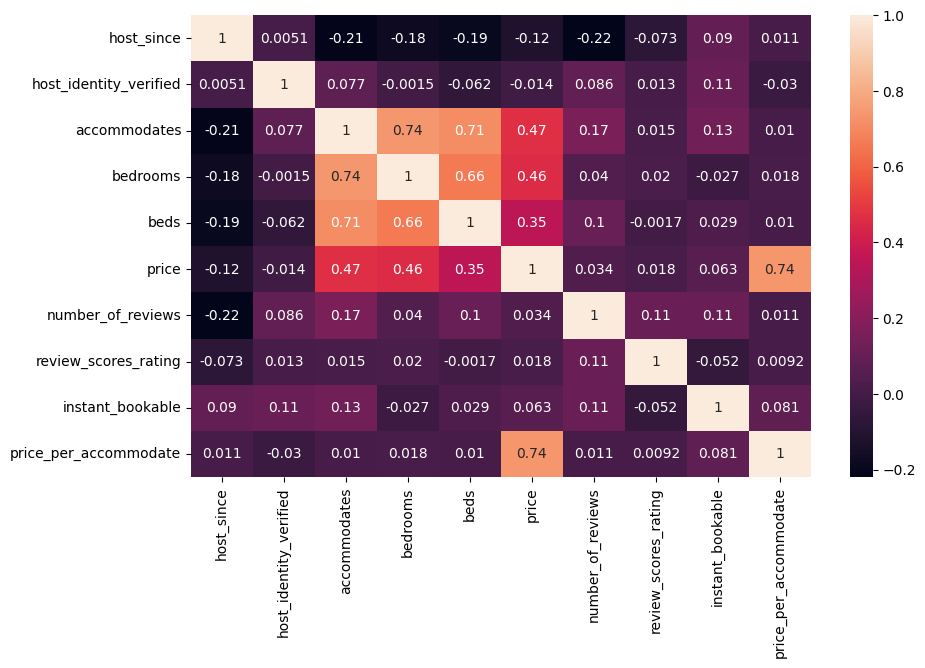

In [ ]:

plt.figure(figsize=(10,6))

#corr = data.corr(numeric_only=True)
#sns.heatmap(corr, annot=True, cmap='coolwarm')

# Compute correlation matrix
data=data.select_dtypes(include='number')  # keep only numeric columns
corr = data.corr()
sns.heatmap(corr, annot= True)


as a tourist i would want to stay with only verifired hosts

In [ ]:
safe = data[data['host_identity_verified'] == 't']
unsafe = data[data['host_identity_verified'] == 'f']
#safe.info()
#safe.isna().sum() , safe.describe()

In [ ]:
#code for only data where price is na
safe[safe['price'].isna()  ]


,host_since,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_cleansed,price_per_accommodate


Average price per neighborhood

In [ ]:
print(data.columns)

Index(['host_since', 'host_identity_verified', 'property_type', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'neighbourhood_group_cleansed', 'price_per_accommodate'],
      dtype='object')


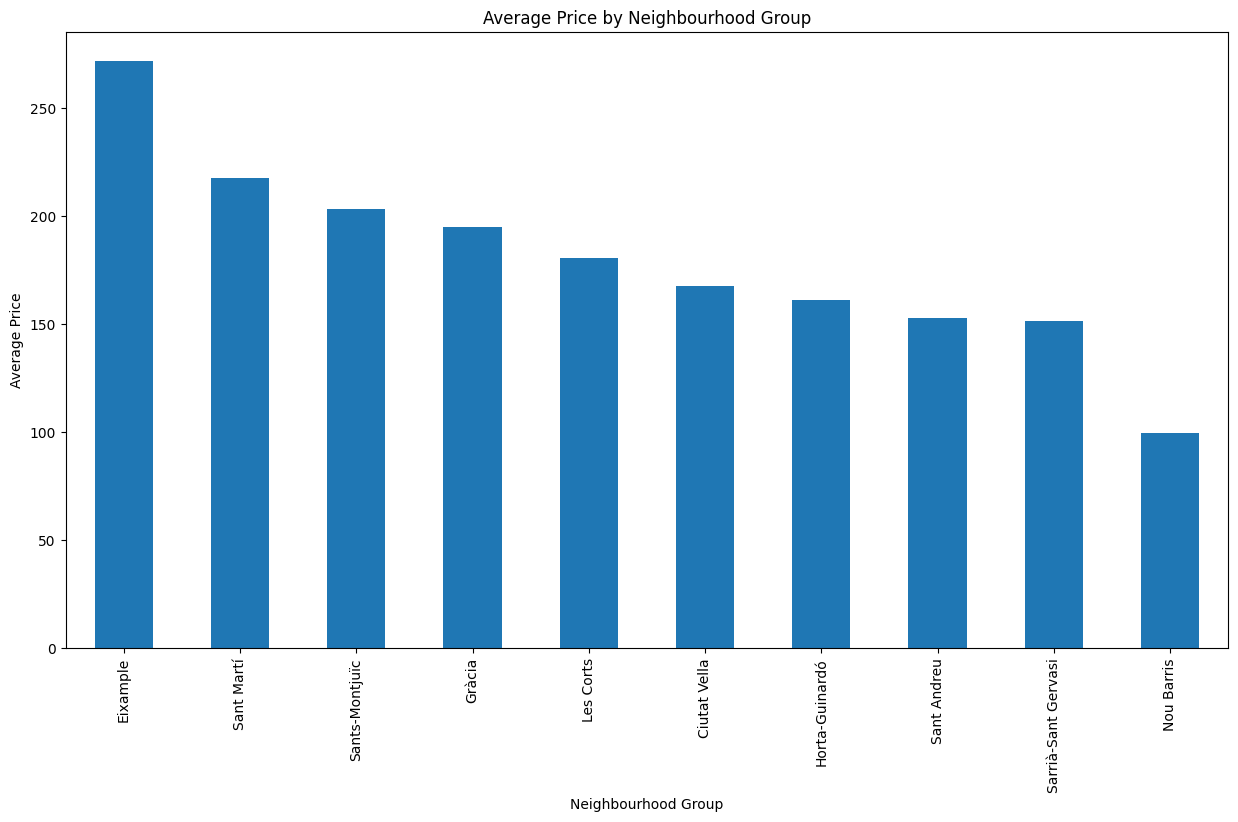

In [ ]:
#len(df2['neighbourhood_group_cleansed'].unique())plt.
plt.figure(figsize=(15,8))
data.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.show()

<Axes: xlabel='neighbourhood_group_cleansed'>

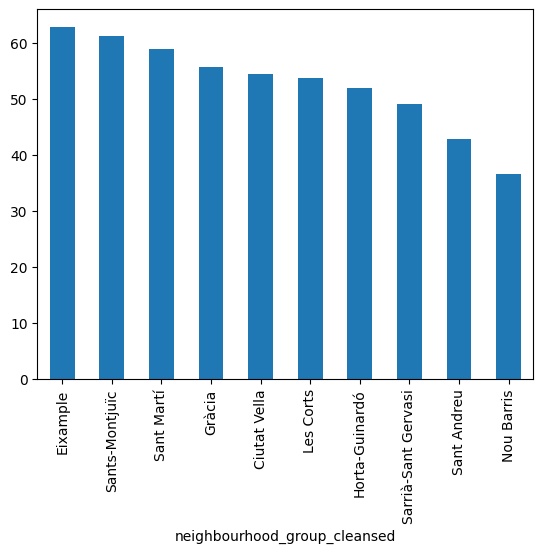

In [ ]:
data.groupby('neighbourhood_group_cleansed')['price_per_accommodate'].mean().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='host_since'>

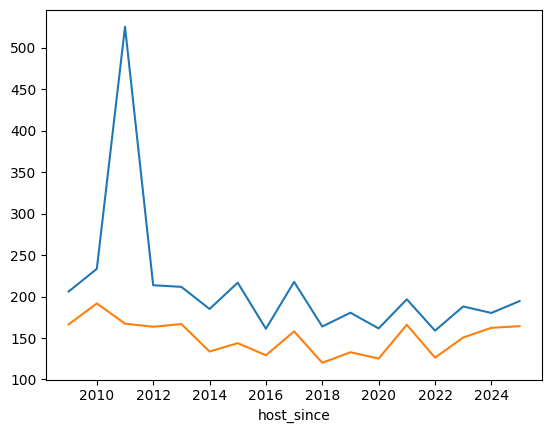

In [ ]:
data.groupby('host_since')['price'].mean().plot(kind = 'line')
#data.groupby('host_since')['price'].median().plot(kind = 'line')

filtered_data = data[data['accommodates'].isin([1, 2, 4])]

# Then group by host_since and plot the mean price
filtered_data.groupby('host_since')['price'].mean().plot(kind='line')


<Axes: xlabel='host_since'>

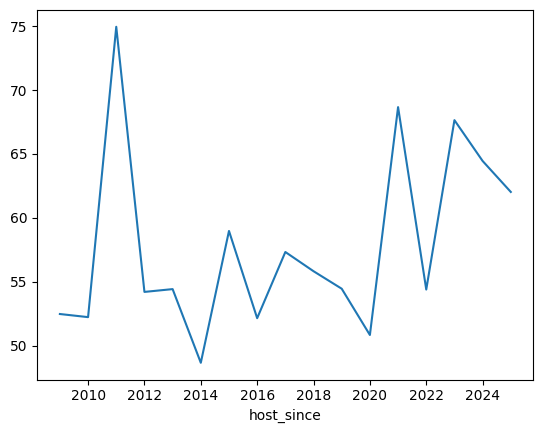

In [ ]:
data.groupby('host_since')['price_per_accommodate'].mean().plot(kind = 'line')


array([   1,   33,  287, 1148, 1616, 1602, 1201, 1778, 1295, 1279, 1309,
       1459, 1633,  952,  965, 1169,  903,  294])

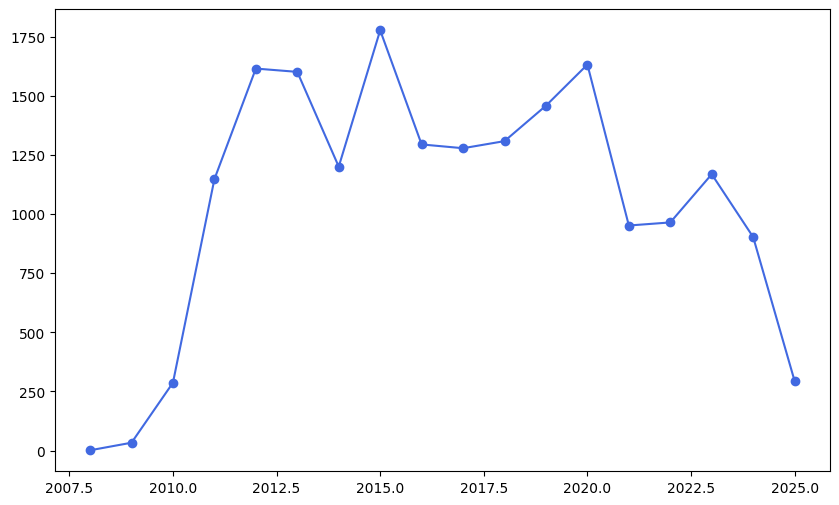

In [ ]:
year_counts = data['host_since'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o', color='royalblue')
year_counts.values

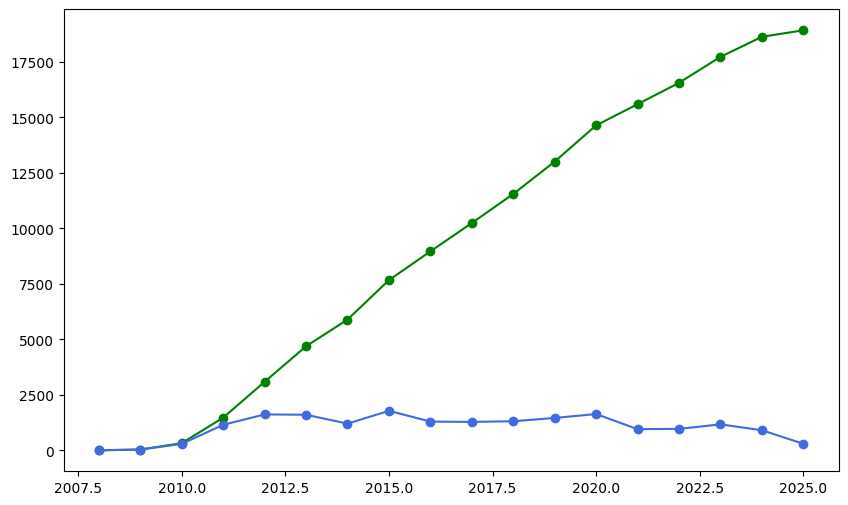

In [ ]:
year_counts = data['host_since'].value_counts().sort_index()
# Calculate cumulative total hosts up to each year
cumulative_hosts = year_counts.cumsum()
# Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_hosts.index, cumulative_hosts.values, marker='o',linestyle='-', color='green')
plt.plot(year_counts.index, year_counts.values, marker='o', color='royalblue')


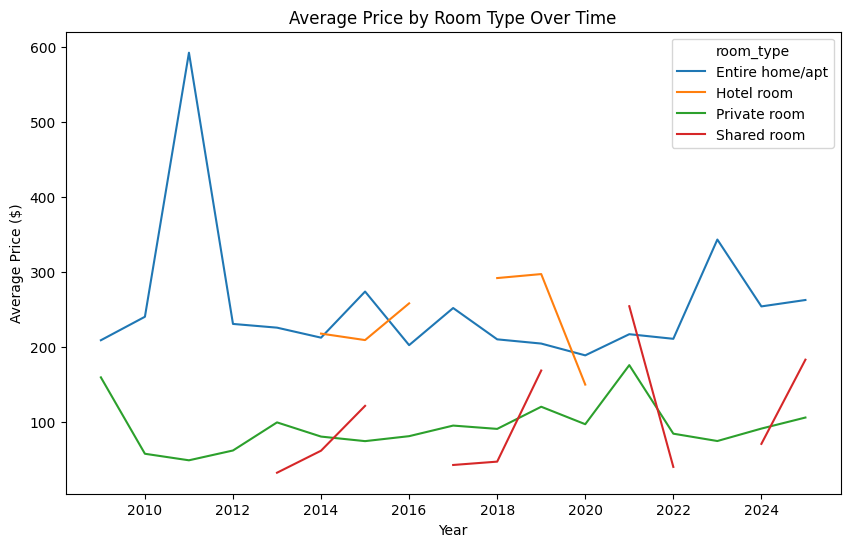

In [ ]:
data.groupby(['host_since', 'room_type'])['price'].mean().unstack().plot(kind='line', figsize=(10,6))
#safe.groupby(['host_since', 'room_type'])['price'].mean().unstack().plot(kind='line', figsize=(10,6))
#unsafe.groupby(['host_since', 'room_type'])['price'].mean().unstack().plot(kind='line', figsize=(10,6))
plt.title('Average Price by Room Type Over Time')
plt.ylabel('Average Price ($)')
plt.xlabel('Year')
plt.show()



<Axes: xlabel='neighbourhood_group_cleansed'>

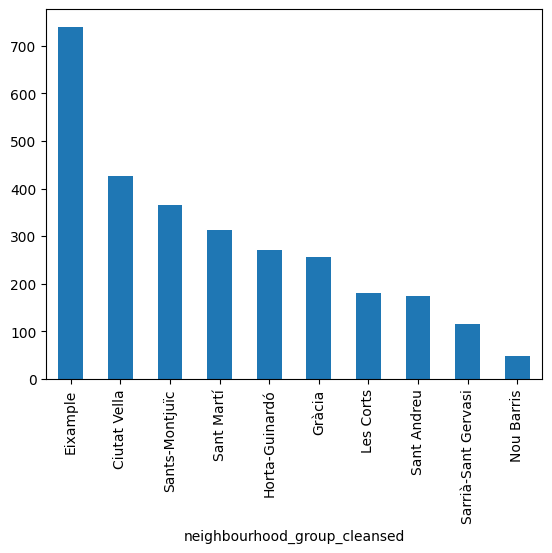

In [ ]:
anamoly = data[data['host_since'] == 2011]
anamoly.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='accommodates'>

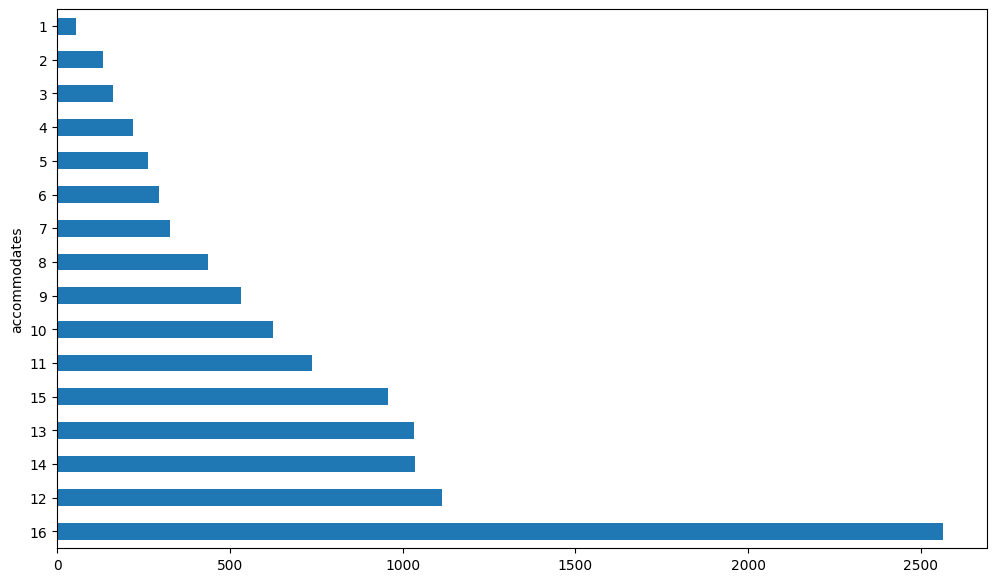

In [ ]:

plt.figure(figsize=(12,7))
data.groupby('accommodates')['price'].mean().sort_values(ascending=False).plot(kind = 'barh')

<Axes: xlabel='accommodates'>

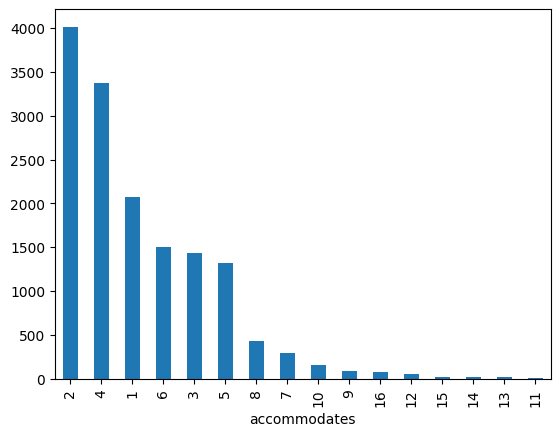

In [ ]:
data.groupby('accommodates')['price'].count().sort_values(ascending=False).plot(kind = 'bar')
# out of 18000 booking majority people book only for2,4,1

<Axes: xlabel='room_type'>

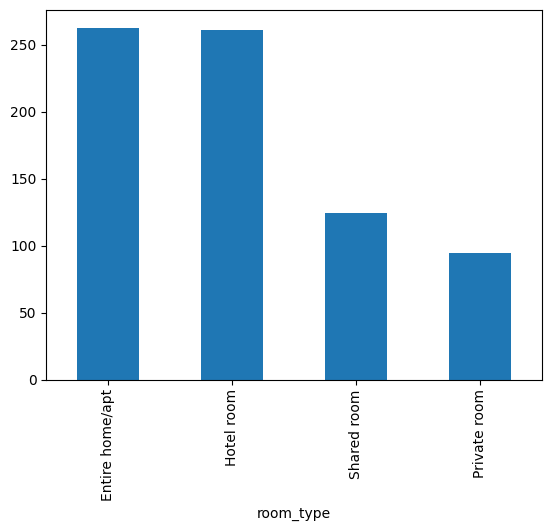

In [ ]:


data.groupby('room_type')['price'].mean().sort_values(ascending=False).plot(kind = 'bar')

<Axes: xlabel='bedrooms'>

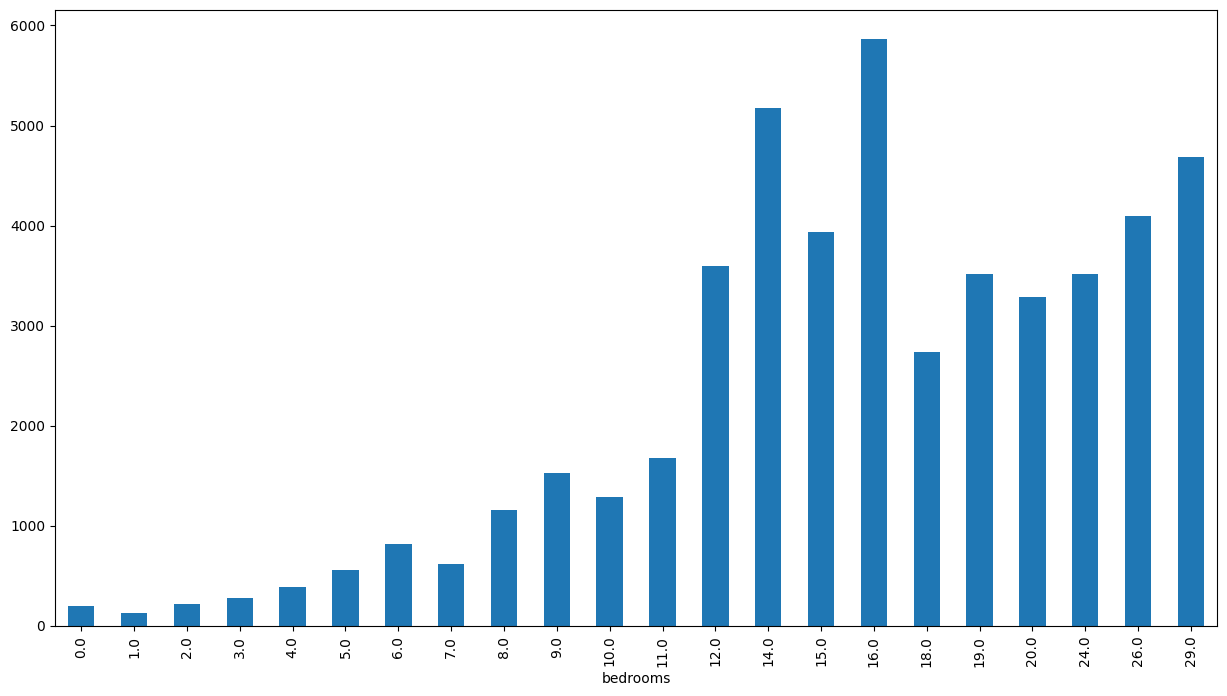

In [ ]:

plt.figure(figsize=(15,8))
data.groupby('bedrooms')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='beds'>

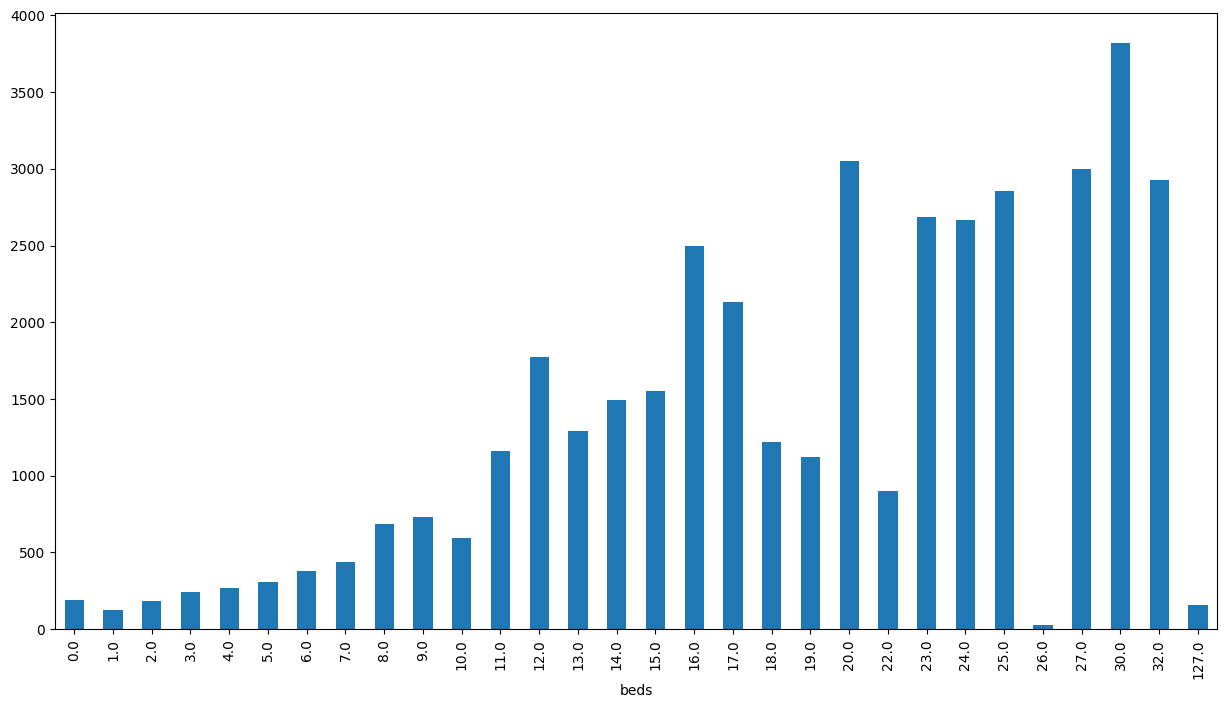

In [ ]:

plt.figure(figsize=(15,8))
data.groupby('beds')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='host_identity_verified'>

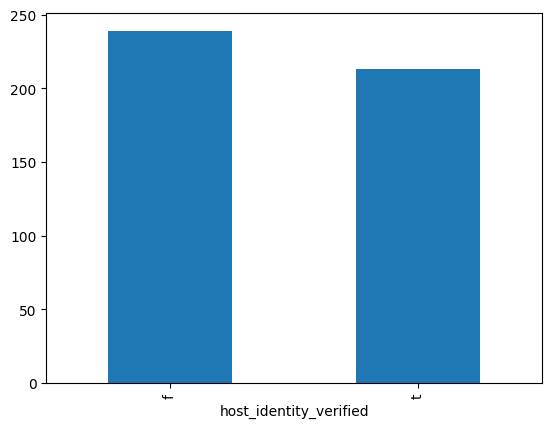

In [ ]:

data.groupby('host_identity_verified')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='instant_bookable'>

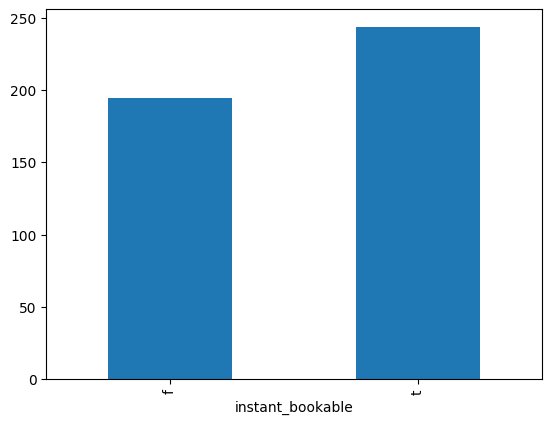

In [ ]:
data.groupby('instant_bookable')['price'].mean().plot(kind = 'bar')